# Figure 4d

This notebook loads the data and produces figure 4d. The intermediate file "figure4d_cluster_regression_coefficients.csv" is calculated in the Analysis folder and reloaded here to be used for the figure. You can reproduce the figure by downloading the file from our data repository. 

In [1]:
savedate = '20251031'

In [2]:
figure_data_folder = '' # save the data from the data repository here in a subfolder called "FigureData"

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as ppt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

## Load data

In [4]:
cluster_coeffs = pd.read_csv(figure_data_folder + 'FigureData/figure4d_cluster_regression_coefficients.csv', index_col=0)

## Plot 

In [5]:
label_mapping = {}
label_mapping['Nice Names Short'] = {0: 'University/college\ncampuses',
  1: 'Weekday daytime\nshort stops',
  2: 'City neighborhoods',
  3: 'Weekday daytime\nlong stops',
  4: 'Gas stations\nvery short stops',
  5: 'Weekend evening\nrecreation',
  6: 'City destinations',
  7: 'Hotels'}

colours_dict8_v3 = {1:'#006837',
                    3:'#1a9850',
                    5:'#a6d96a',
                    2:'#fdae61',
                    6:'#f46d43',
                    7:'#cb181d',
                    4:'#df65b0',
                   0:'#8073ac'}

cluster_order_numbers8_v3 = [1, 3, 5, 2, 6, 7, 4, 0]

In [6]:
def stars(pval):
    if pval < 0.05:
        if pval < 0.01:
            if pval < 0.001:
                return "***"
            else:
                return "**"
        else:
            return '*'
    else:
        return ''

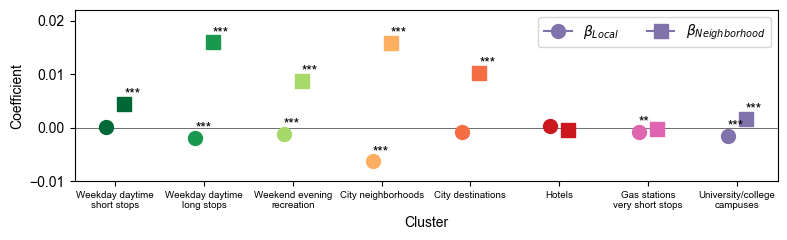

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(8, 2.5), sharey=True, sharex=True)
for i, j in enumerate(cluster_order_numbers8_v3):

    coeff = cluster_coeffs[cluster_coeffs['Cluster']==j].loc['median_household_income_imputed_10k', 'Coeff']
    error = cluster_coeffs[cluster_coeffs['Cluster']==j].loc['median_household_income_imputed_10k', 'BSE']
    pval = cluster_coeffs[cluster_coeffs['Cluster']==j].loc['median_household_income_imputed_10k', 'Pvals']
    
    if i == 7:
        axes.errorbar([i+1-0.1], [coeff], c=colours_dict8_v3[j], yerr=error, marker='o', markersize=10, label=r'$\beta_{Local}$')
    else:
        axes.errorbar([i+1-0.1], [coeff], c=colours_dict8_v3[j], yerr=error, marker='o', markersize=10)
    if pval < 0.05:
        starvals = stars(pval)
        axes.annotate(starvals,(i+1-0.1, coeff+0.001))

    coeff = cluster_coeffs[cluster_coeffs['Cluster']==j].loc['av_income_10km_withoutBG_imputed_10k', 'Coeff']
    error = cluster_coeffs[cluster_coeffs['Cluster']==j].loc['av_income_10km_withoutBG_imputed_10k', 'BSE']
    pval = cluster_coeffs[cluster_coeffs['Cluster']==j].loc['av_income_10km_withoutBG_imputed_10k', 'Pvals']
    
    if i == 7:
        axes.errorbar([i+1+0.1], [coeff], c=colours_dict8_v3[j], yerr=error, marker='s', markersize=10, label=r'$\beta_{Neighborhood}$')
    else:
        axes.errorbar([i+1+0.1], [coeff], c=colours_dict8_v3[j], yerr=error, marker='s', markersize=10)
    if pval < 0.05:
        starvals = stars(pval)
        axes.annotate(starvals,(i+1+0.1, coeff+0.001))

axes.set_xticks(np.arange(1, 9), labels=[label_mapping['Nice Names Short'][j] for j in cluster_order_numbers8_v3], fontsize=7)
axes.axhline(0, color='k', linewidth=0.4)
axes.set_ylim([-0.01, 0.022])
axes.set_xlabel('Cluster')
axes.set_ylabel('Coefficient')
axes.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.savefig('Figures/figure4d_regression_'+savedate+'.pdf', bbox_inches='tight')
plt.show()
